# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/human-eye.jpg"
import base64

with open(path, "rb") as img_file:
    b64 = base64.b64encode(img_file.read()).decode()

print(b64[:200])


UklGRjZqAQBXRUJQVlA4ICpqAQBwPgWdASqEA6MCPm0ylEekIqIjptPLQIANiWNtVwiKe8h+MWpAB7MbO6R9tBTl87lg53WX/Zv9L7AHG5tEdIPvX+Q7K0d9yPmFHrz/6sf0tTm7K8kzO/jv+Xz9elb+2dK//7fu98Af3s9Xf7r+uZ6e/+P6jn/16oX/NdNJ6zH+A/+f


(np.float64(-0.5), np.float64(899.5), np.float64(674.5), np.float64(-0.5))

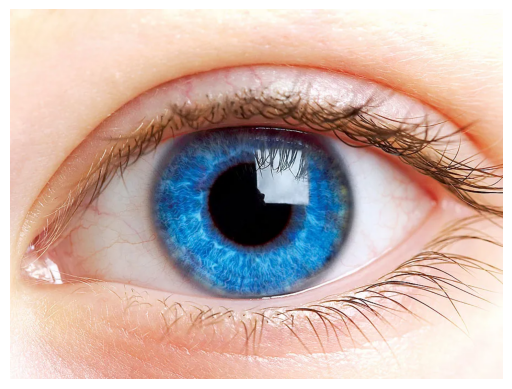

In [ ]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np


base64_image = b64


img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [ ]:
import cv2
img_bgr = cv2.imread("/content/drive/MyDrive/human-eye.jpg") # loads as BGR

(np.float64(-0.5), np.float64(899.5), np.float64(674.5), np.float64(-0.5))

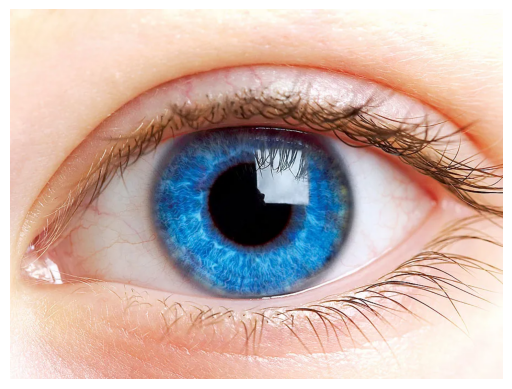

In [ ]:
import matplotlib.pyplot as plt

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")


In [ ]:
gray_manual = (0.299 * img_rgb[:,:,0] +
               0.587 * img_rgb[:,:,1] +
               0.114 * img_rgb[:,:,2]).astype(np.uint8)



In [ ]:
gray_cv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


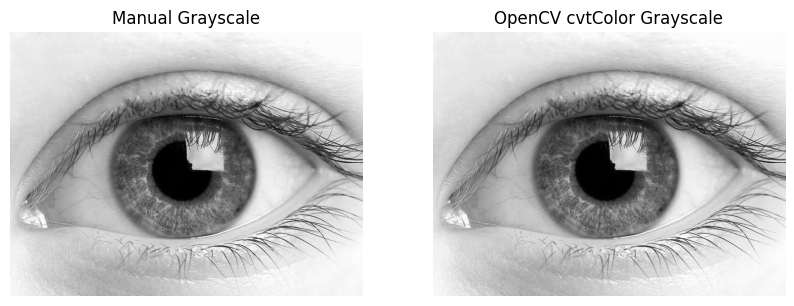

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray_manual, cmap="gray")
plt.title("Manual Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gray_cv, cmap="gray")
plt.title("OpenCV cvtColor Grayscale")
plt.axis("off")

plt.show()


In [ ]:
print("RGB image shape:", img_rgb.shape)
print("Grayscale image shape:", gray_manual.shape)


RGB image shape: (675, 900, 3)
Grayscale image shape: (675, 900)


In [ ]:
print("First 5 RGB pixels of row 0:")
print(img_rgb[0, :5])

print("\nFirst 5 Grayscale pixels of row 0:")
print(gray_manual[0, :5])


First 5 RGB pixels of row 0:
[[255 241 223]
 [255 241 223]
 [255 241 223]
 [255 241 223]
 [255 241 223]]

First 5 Grayscale pixels of row 0:
[243 243 243 243 243]


In [ ]:
import numpy as np

for i in range(5):
    r = np.random.randint(0, img_rgb.shape[0])
    c = np.random.randint(0, img_rgb.shape[1])
    print(f"Pixel ({r},{c}) - RGB: {img_rgb[r,c]}  Gray: {gray_manual[r,c]}")


Pixel (614,776) - RGB: [254 247 234]  Gray: 247
Pixel (316,452) - RGB: [196 205 220]  Gray: 204
Pixel (125,687) - RGB: [237 159 122]  Gray: 178
Pixel (401,136) - RGB: [189 142 123]  Gray: 153
Pixel (340,578) - RGB: [ 43 128 181]  Gray: 108


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [ ]:
import numpy as np


# Compute 2D FFT
f = np.fft.fft2(gray_manual)

#  Shift the zero frequency component to the center
fshift = np.fft.fftshift(f)

# fshift now contains the centered FFT of the grayscale image


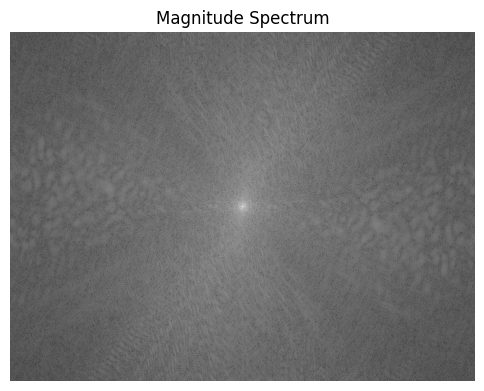

In [ ]:
import matplotlib.pyplot as plt
magnitude = np.abs(fshift)
phase = np.angle(fshift)

# Step 4: Compute magnitude spectrum for visualization
magnitude_spectrum = 20 * np.log(magnitude + 1)  # log scale for visibility

# Step 5: Display magnitude spectrum
plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

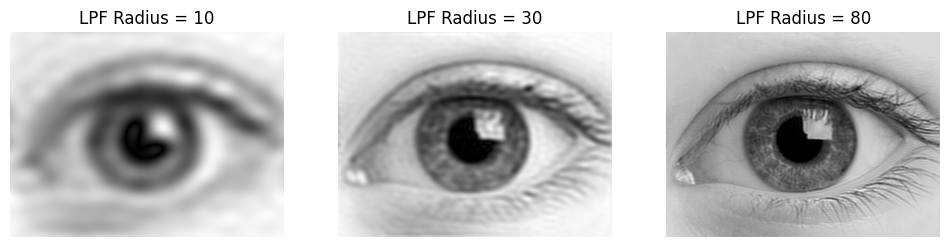

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume gray_img is  grayscale image as a NumPy array
rows, cols = gray_manual.shape
crow, ccol = rows // 2, cols // 2  # center of the frequency transform

#  Compute FFT and shift
f = np.fft.fft2(gray_manual)
fshift = np.fft.fftshift(f)

# Define radii for LPF (can adjust based on image size)
radii = [10, 30, 80]

#  Apply LPF masks, reconstruct, and show results
plt.figure(figsize=(12,4))
for i, r in enumerate(radii):

    #  Create circular LPF mask
    mask = np.zeros((rows, cols))
    y, x = np.ogrid[:rows, :cols]
    mask_area = (x - ccol)**2 + (y - crow)**2 <= r**2
    mask[mask_area] = 1
    #  Apply mask to shifted FFT
    fshift_masked = fshift * mask
    #  Reconstruct image using inverse FFT
    img_back = np.fft.ifft2(np.fft.ifftshift(fshift_masked))
    img_back = np.abs(img_back)  # take magnitude to get real image

    #  Display reconstructed image
    plt.subplot(1, len(radii), i+1)
    plt.imshow(img_back, cmap='gray')
    plt.title(f'LPF Radius = {r}')
    plt.axis('off')

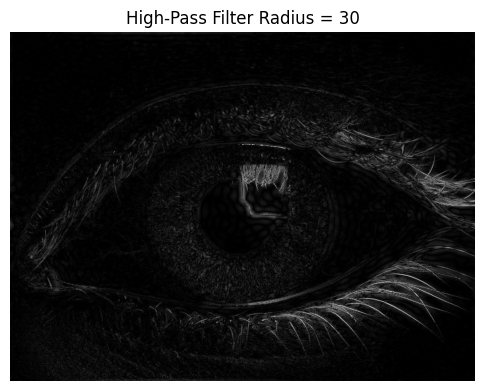

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume gray_img is  grayscale image as a NumPy array
rows, cols = gray_manual.shape
crow, ccol = rows // 2, cols // 2  # center

#  Compute FFT and shift
f = np.fft.fft2(gray_manual)
fshift = np.fft.fftshift(f)

#  Define HPF radius
radius = 30  # adjust as needed

#  Create HPF mask
mask = np.ones((rows, cols))  # start with all ones (pass all frequencies)
y, x = np.ogrid[:rows, :cols]
mask_area = (x - ccol)**2 + (y - crow)**2 <= radius**2
mask[mask_area] = 0  # block low frequencies in the center

#  Apply mask to shifted FFT
fshift_masked = fshift * mask

#  Reconstruct image using inverse FFT
img_back = np.fft.ifft2(np.fft.ifftshift(fshift_masked))
img_back = np.abs(img_back)  # take magnitude to get real image

#  Display
plt.figure(figsize=(6,6))
plt.imshow(img_back, cmap='gray')
plt.title(f'High-Pass Filter Radius = {radius}')
plt.axis('off')
plt.show()


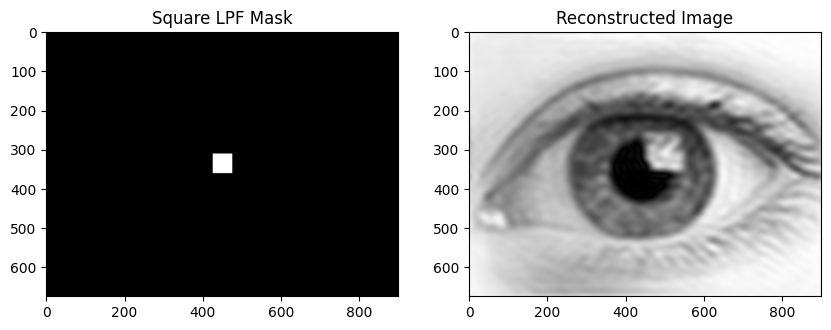

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


rows, cols = fshift.shape
crow, ccol = rows//2, cols//2

# Create a square LPF mask
mask = np.zeros((rows, cols), dtype=np.uint8)
side = 50  # size of the square
half_side = side // 2
mask[crow-half_side:crow+half_side, ccol-half_side:ccol+half_side] = 1

# Apply mask
fshift_square = fshift * mask

# Reconstruct image
f_ishift = np.fft.ifftshift(fshift_square)
img_reconstructed = np.fft.ifft2(f_ishift)
img_reconstructed = np.abs(img_reconstructed)

# Display
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Square LPF Mask")
plt.imshow(mask, cmap='gray')

plt.subplot(1,2,2)
plt.title("Reconstructed Image")
plt.imshow(img_reconstructed, cmap='gray')
plt.show()


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

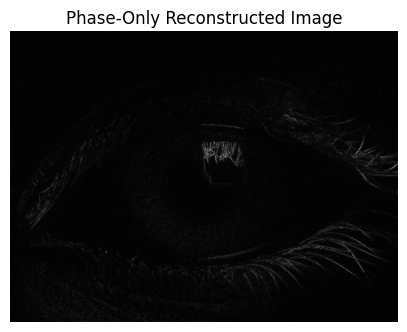

In [ ]:
# Create phase-only data
phase_only = fshift / np.abs(fshift)

# Reverse shift
phase_ishift = np.fft.ifftshift(phase_only)

# Inverse FFT
img_phase = np.fft.ifft2(phase_ishift)

# Take magnitude (to view as image)
img_phase = np.abs(img_phase)

# Display
plt.figure(figsize=(5,5))
plt.title("Phase-Only Reconstructed Image")
plt.imshow(img_phase, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
#phase_only = fshift / abs(fshift)

#Gives complex numbers of the form:

#e^(jθ)

#np.angle(fshift)

#Gives only the phase angle (θ in radians):

#θ (between -π to π)

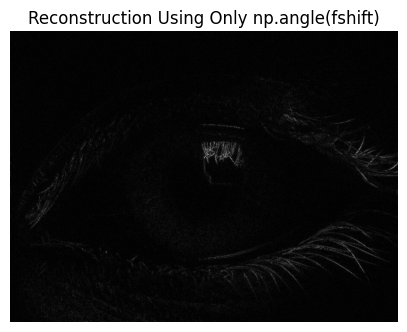

In [ ]:


# Extract just the phase ANGLE values (in radians)
# np.angle(fshift) returns numbers between -π and +π.

#   These are just angles  NOT complex frequency values.
#   The FFT cannot be inverted using only angles.
phase_angles = np.angle(fshift)


#  Convert these angles back to COMPLEX numbers
# Because IFFT requires complex values of the form e^(jθ)
# Without this, we cannot reconstruct anything.
#
# np.exp(1j * phase_angles) creates complex numbers with:
#   - magnitude = 1
#   - phase = angle from FFT
phase_from_angle = np.exp(1j * phase_angles)


#  Reverse shift
phase_ishift = np.fft.ifftshift(phase_from_angle)

#  Inverse FFT to get spatial domain
img_from_angle = np.fft.ifft2(phase_ishift)

# Convert to real image for display
img_from_angle = np.abs(img_from_angle)

# THE RESULT

plt.figure(figsize=(5,5))
plt.title("Reconstruction Using Only np.angle(fshift)")
plt.imshow(img_from_angle, cmap='gray')
plt.axis("off")
plt.show()


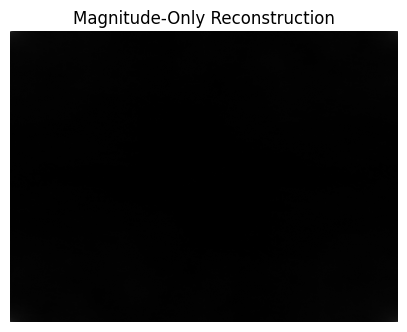

In [ ]:

# Take only the magnitude of the FFT
# np.abs(fshift) removes all phase information.
# Phase contains structure, edges, shapes.
# Magnitude contains only frequency strength.
mag_only = np.abs(fshift)



# mag_only is ONLY magnitudes (no direction).
# This means image structure is lost.
# Reconstruction from magnitude alone normally gives:
#       - a smooth, blurry patch
#       - almost no recognizable shapes
#       - sometimes a circular glow
# This happens because phase = 0 everywhere,
# so all frequencies are aligned without spatial meaning.


#  Convert magnitude to COMPLEX by adding zero phase
# IFFT requires complex inputs.
# e^(j*0) = 1  → so we multiply magnitude by 1.
mag_complex = mag_only * np.exp(1j * 0)


#  Reverse shift
mag_ishift = np.fft.ifftshift(mag_complex)

#  Inverse FFT
img_mag = np.fft.ifft2(mag_ishift)

#  Convert to real values for display
img_mag = np.abs(img_mag)

# DISPLAY

plt.figure(figsize=(5,5))
plt.title("Magnitude-Only Reconstruction")
plt.imshow(img_mag, cmap='gray')
plt.axis("off")
plt.show()


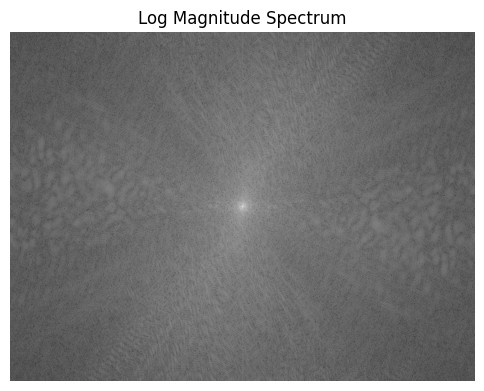

In [ ]:
# fshift = np.fft.fftshift( fft of grayscale image )

# Compute magnitude
magnitude = np.abs(fshift)

# Apply logarithm for better visualization
# log compresses very large values → makes spectrum visible
log_magnitude = np.log(1 + magnitude)

# Display
plt.figure(figsize=(6,6))
plt.title("Log Magnitude Spectrum")
plt.imshow(log_magnitude, cmap='gray')
plt.axis("off")
plt.show()


In [ ]:
#Magnitude Spectrum ≠ Magnitude

#Magnitude Spectrum is log(1 + |F|) → designed for visualization

#Magnitude-only reconstruction uses |F| → raw values used for computation

#Because they are fundamentally different data:

# Magnitude Spectrum

#Looks detailed because log() shows tiny frequencies clearly.

# Magnitude-only Reconstruction

#Looks like a blurred glow (or black) because raw magnitude does not encode shape, and no log is applied.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

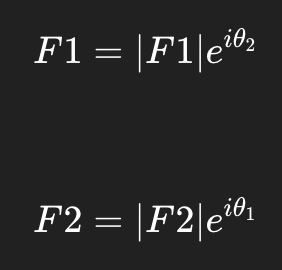

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

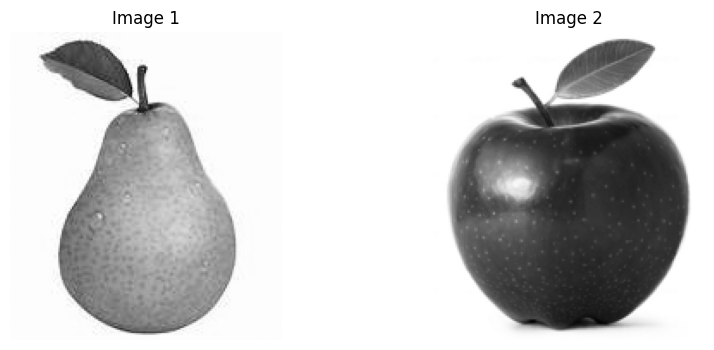

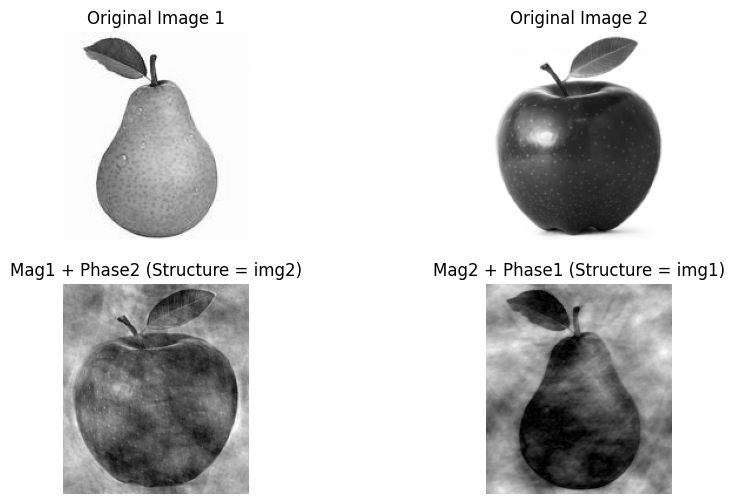

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


img1 = np.array(Image.open("/content/drive/MyDrive/pear.png").convert("L"), dtype=float)
img2_orig = Image.open("/content/drive/MyDrive/apple-fruit.png").convert("L") # Load original image to get its size

# Get the dimensions of img1
rows1, cols1 = img1.shape

# Resize img2 to match the dimensions of img1 (PIL.Image.resize expects (width, height))
img2 = np.array(img2_orig.resize((cols1, rows1)), dtype=float)


plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.title("Image 1"); plt.imshow(img1, cmap='gray'); plt.axis('off')
plt.subplot(1,2,2); plt.title("Image 2"); plt.imshow(img2, cmap='gray'); plt.axis('off')
plt.show()

F1 = np.fft.fftshift(np.fft.fft2(img1))
F2 = np.fft.fftshift(np.fft.fft2(img2))


# Get Magnitudes and Phases

mag1, phase1 = np.abs(F1), np.angle(F1)
mag2, phase2 = np.abs(F2), np.angle(F2)
#  Swap magnitude and phase

# Magnitude of image 1 + Phase of image 2
swap12 = mag1 * np.exp(1j * phase2)

# Magnitude of image 2 + Phase of image 1
swap21 = mag2 * np.exp(1j * phase1)

# Reconstruct BOTH swapped images


# Reverse shift
swap12_ishift = np.fft.ifftshift(swap12)
swap21_ishift = np.fft.ifftshift(swap21)

# Inverse FFT
rec12 = np.abs(np.fft.ifft2(swap12_ishift))
rec21 = np.abs(np.fft.ifft2(swap21_ishift))

# 6. DISPLAY RESULTS


plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.title("Original Image 1")
plt.imshow(img1, cmap='gray'); plt.axis('off')

plt.subplot(2,2,2)
plt.title("Original Image 2")
plt.imshow(img2, cmap='gray'); plt.axis('off')

plt.subplot(2,2,3)
plt.title("Mag1 + Phase2 (Structure = img2)")
plt.imshow(rec12, cmap='gray'); plt.axis('off')

plt.subplot(2,2,4)
plt.title("Mag2 + Phase1 (Structure = img1)")
plt.imshow(rec21, cmap='gray'); plt.axis('off')

plt.show()



# - When we use magnitude of Image 1 + phase of Image 2:
#       The reconstructed image looks like Image 2 in shape/structure,
#       but the "texture / brightness pattern" feels like Image 1.
#
# - When you use magnitude of Image 2 + phase of Image 1:
#       The reconstructed image looks like Image 1 in shape/structure,
#       but the surface texture resembles Image 2.
#
# This happens because:
#        PHASE describes the structure, shapes, edges, layout.
#        MAGNITUDE describes texture, contrast, brightness distribution.
#
# Therefore, PHASE carries most of the information needed to identify an image.